In [1]:
# GRU Model Notebook

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load preprocessed data
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [3]:
# Build GRU model
model = Sequential([
    GRU(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    GRU(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(y_train.shape[1])
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 50)            8550      
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 50)                15300     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 5)                 255       
                                                                 
Total params: 24105 (94.16 KB)
Trainable params: 24105 (94.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
184/184 [==============================] - 8s 14ms/step - loss: 0.0111 - val_loss: 0.0025
Epoch 2/100
184/184 [==============================] - 2s 11ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 3/100
184/184 [==============================] - 2s 10ms/step - loss: 0.0031 - val_loss: 0.0019
Epoch 4/100
184/184 [==============================] - 2s 10ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 5/100
184/184 [==============================] - 2s 10ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 6/100
184/184 [==============================] - 2s 10ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 7/100
184/184 [==============================] - 2s 10ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 8/100
184/184 [==============================] - 2s 10ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 9/100
184/184 [==============================] - 2s 10ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 10/100
184/184 [==============================] - 2s 10ms/step - loss: 0.002

In [5]:
# Evaluate the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

58/58 [==============================] - 1s 4ms/step
Mean Squared Error: 0.0010654958999574706
Mean Absolute Error: 0.017874308756622166
R-squared Score: 0.8241953140181908


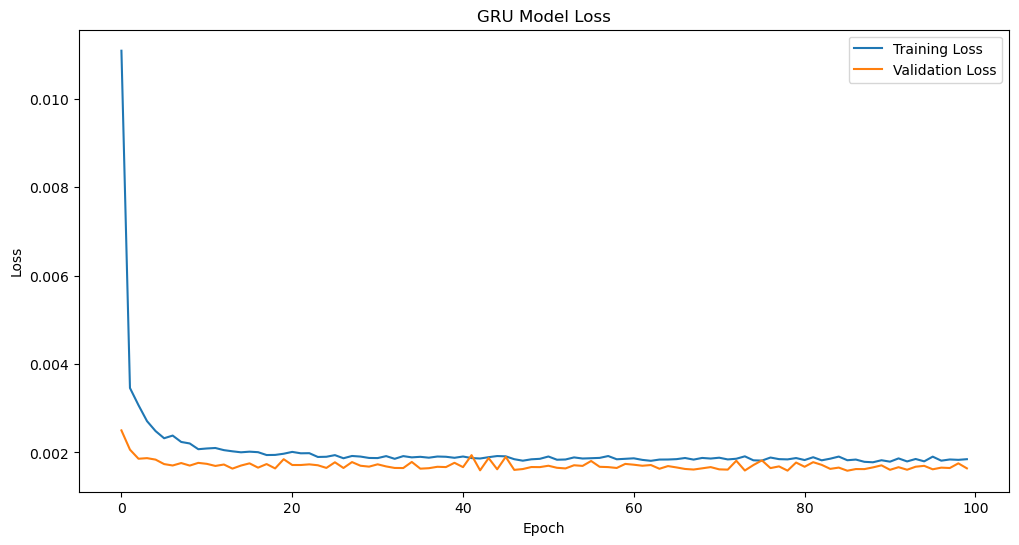

In [6]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

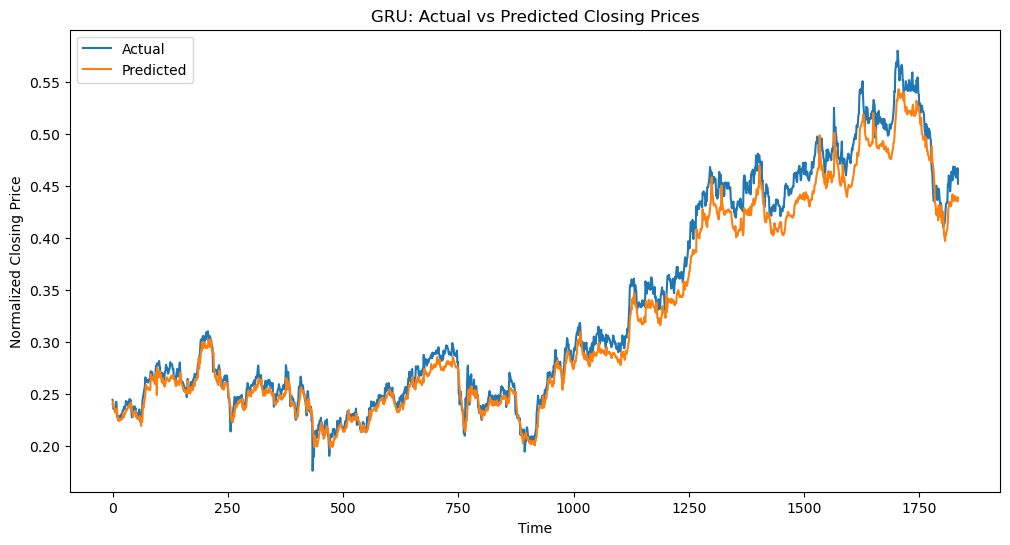

In [7]:
# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 0], label='Actual')
plt.plot(y_pred[:, 0], label='Predicted')
plt.title('GRU: Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Normalized Closing Price')
plt.legend()
plt.show()

F1 Score: 0.4828


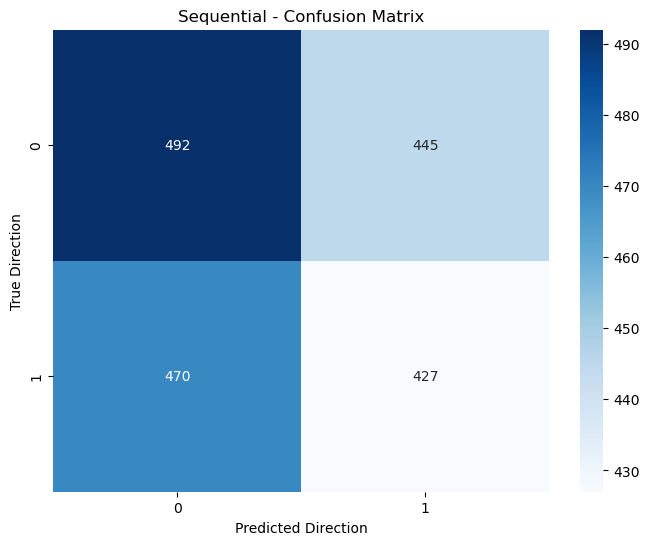

Accuracy: 0.5011
True Positive Rate (Sensitivity): 0.4760
True Negative Rate (Specificity): 0.5251
Positive Predictive Value (Precision): 0.4897
Negative Predictive Value: 0.5114


In [8]:
# Additional Evaluation Metrics

import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_additional_metrics(y_true, y_pred):
    # Calculate price movement direction
    y_true_direction = np.diff(y_true[:, 0]) > 0
    y_pred_direction = np.diff(y_pred[:, 0]) > 0

    # Compute confusion matrix
    cm = confusion_matrix(y_true_direction, y_pred_direction)

    # Compute F1 score
    f1 = f1_score(y_true_direction, y_pred_direction)

    return cm, f1

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title} - Confusion Matrix')
    plt.ylabel('True Direction')
    plt.xlabel('Predicted Direction')
    plt.show()

# Calculate additional metrics
cm, f1 = calculate_additional_metrics(y_test, y_pred)

# Print F1 score
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
plot_confusion_matrix(cm, model.__class__.__name__)

# Interpret confusion matrix
tn, fp, fn, tp = cm.ravel()
total = tn + fp + fn + tp
accuracy = (tn + tp) / total
print(f"Accuracy: {accuracy:.4f}")
print(f"True Positive Rate (Sensitivity): {tp / (tp + fn):.4f}")
print(f"True Negative Rate (Specificity): {tn / (tn + fp):.4f}")
print(f"Positive Predictive Value (Precision): {tp / (tp + fp):.4f}")
print(f"Negative Predictive Value: {tn / (tn + fn):.4f}")

Evaluation Metrics:
mse: 0.0011
mae: 0.0179
r2_score: 0.8242
accuracy: 0.5011
f1_score: 0.4828


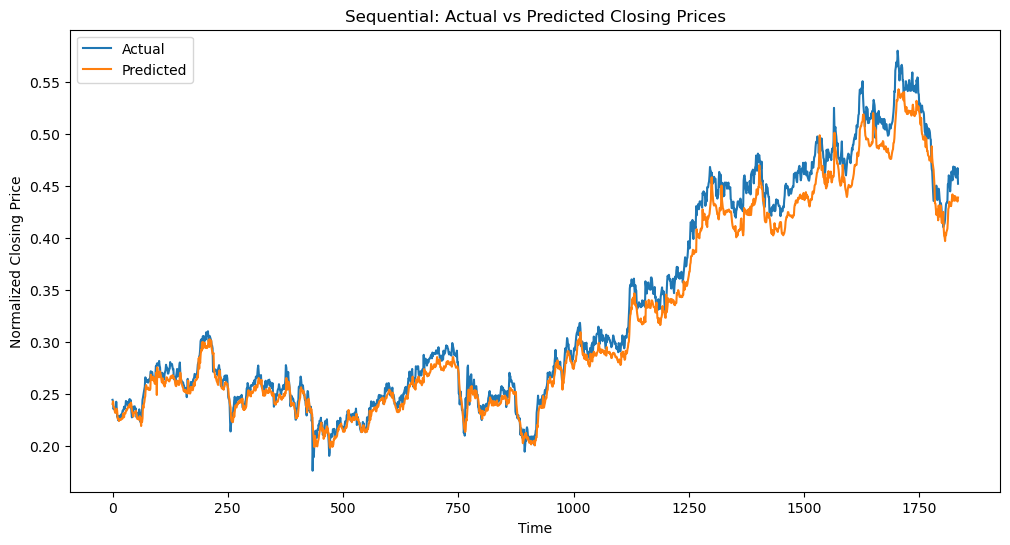

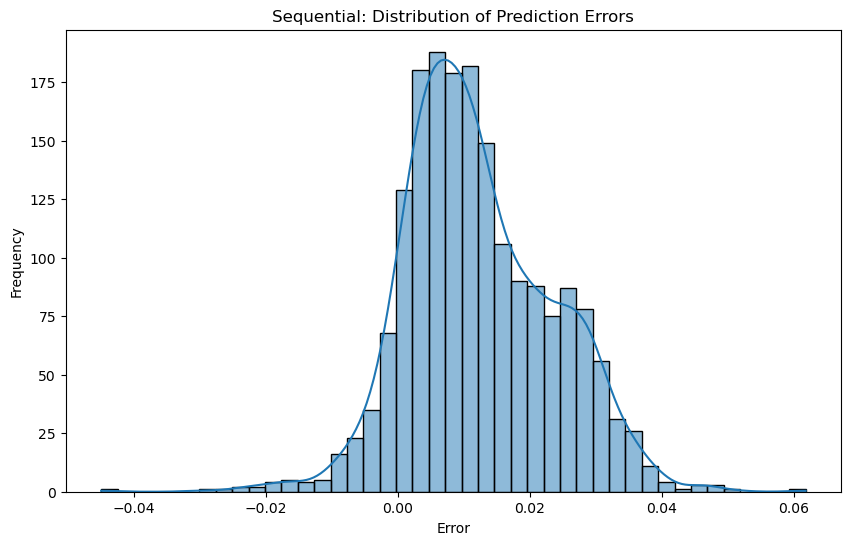

In [9]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_direction_metrics(y_true, y_pred, threshold=0):
    """
    Calculate accuracy and F-score based on the direction of price movement.
    
    :param y_true: True closing prices
    :param y_pred: Predicted closing prices
    :param threshold: Minimum change to be considered as a movement (default: 0)
    :return: Dictionary containing accuracy and F-score
    """
    # Calculate price movement direction
    y_true_direction = np.diff(y_true[:, 0]) > threshold
    y_pred_direction = np.diff(y_pred[:, 0]) > threshold
    
    # Compute accuracy and F-score
    accuracy = accuracy_score(y_true_direction, y_pred_direction)
    f1 = f1_score(y_true_direction, y_pred_direction)
    
    return {
        'accuracy': accuracy,
        'f1_score': f1
    }

def evaluate_regression_model(y_true, y_pred):
    """
    Evaluate regression model using various metrics.
    
    :param y_true: True closing prices
    :param y_pred: Predicted closing prices
    :return: Dictionary containing evaluation metrics
    """
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    direction_metrics = calculate_direction_metrics(y_true, y_pred)
    
    return {
        'mse': mse,
        'mae': mae,
        'r2_score': r2,
        'accuracy': direction_metrics['accuracy'],
        'f1_score': direction_metrics['f1_score']
    }

def plot_predictions(y_true, y_pred, title):
    """
    Plot true vs predicted values.
    
    :param y_true: True closing prices
    :param y_pred: Predicted closing prices
    :param title: Title of the plot
    """
    plt.figure(figsize=(12, 6))
    plt.plot(y_true[:, 0], label='Actual')
    plt.plot(y_pred[:, 0], label='Predicted')
    plt.title(f'{title}: Actual vs Predicted Closing Prices')
    plt.xlabel('Time')
    plt.ylabel('Normalized Closing Price')
    plt.legend()
    plt.show()

def plot_error_distribution(y_true, y_pred, title):
    """
    Plot the distribution of prediction errors.
    
    :param y_true: True closing prices
    :param y_pred: Predicted closing prices
    :param title: Title of the plot
    """
    errors = y_true[:, 0] - y_pred[:, 0]
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, kde=True)
    plt.title(f'{title}: Distribution of Prediction Errors')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.show()

# Example usage (add this to each model notebook after making predictions):
metrics = evaluate_regression_model(y_test, y_pred)
print("Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

plot_predictions(y_test, y_pred, model.__class__.__name__)
plot_error_distribution(y_test, y_pred, model.__class__.__name__)